#display contents in csv file

ทำการแสดงค่าจาก csv file ในรูปแบบ pandas

In [ ]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()
#160 ชุดข้อมูล

,Title,Sec,Lab,Quiz-Q1,Quiz-Q2,Quiz-Q3,Quiz-Q4,Quiz-Q5,Quiz-Q6,Midterm-Q1,Midterm-Q2,Midterm-Q3,Midterm-Q4,Grade
0,MISS,3,15.0,1.3,2.5,2.3,1.6,3.0,1.7,6,0.5,1.5,11.75,C+
1,MISS,3,15.0,3.0,4.5,3.3,2.2,3.3,2.9,4,2.5,2.5,9.50,B
2,MR.,3,15.0,4.7,2.0,2.7,1.4,3.5,2.8,7,0.5,1.0,13.03,C+
3,MR.,1,5.9,0.3,0.0,0.0,0.2,0.3,0.8,1,0.0,0.0,11.00,D
4,MR.,3,11.8,3.3,3.3,2.2,0.9,1.1,0.2,8,0.0,0.0,10.50,C


#Data Preparation
ในกระบวนการนี้เราทำแค่ label encoding เนื่องจาก ข้อมูลที่เราใช้เป็นข้อมูลที่เป็นตัวเลขอยู่แล้ว จึงไม่ต้องใช้ one-hot encoding และ ordinal encoding ในการ encode ข้อมูล

##LabelEncoder

เนื่องจากค่า Label('Grade') มีค่าเป็น {'A','B','B+','C', ...} เราจึงนำค่าเหล่านี้มา encode ด้วย Label Encoder ให้เป็นตัวเลข

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(data['Grade'].values)
y = label_encoder.transform(data['Grade'])
print(y)
print(label_encoder.classes_)

[4 1 4 5 3 1 0 3 0 5 1 0 2 4 0 4 2 3 1 0 2 4 2 1 1 0 3 0 0 1 5 4 1 1 4 2 5
 2 0 3 1 2 7 2 7 5 1 4 1 0 4 7 2 3 1 4 4 3 6 1 3 0 4 3 2 0 3 2 4 7 6 2 2 3
 4 5 4 3 7 0 2 1 3 2 0 6 0 3 4 4 3 2 2 0 6 3 4 7 7 1 4 1 1 1 2 4 2 7 7 2 0
 2 1 1 3 1 2 0 3 4 4 3 7 3 0 4 4 0 6 0 7 4 4 3 4 1 3 4 4 4 1 1 7 2 7 3 0 6
 1 5 4 4 3 1 4 0 7 0 3 4]
['A' 'B' 'B+' 'C' 'C+' 'D' 'D+' 'F']


# Model Selection

การคัดเลือกโมเดลจาก Tree base ได้แก่ Decision Tree, Random Forest Classifier และ XGB Classifier

In [ ]:
#โชว์ feature ที่มีประโชน์ในการ Predict ค่าข้อมูลออกมา
feat_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
X = data[feat_cols]
for i, c in enumerate(X.columns):
	print(i, c)

0 Lab
1 Quiz-Q1
2 Quiz-Q2
3 Quiz-Q3
4 Quiz-Q4
5 Quiz-Q5
6 Quiz-Q6
7 Midterm-Q1
8 Midterm-Q2
9 Midterm-Q3
10 Midterm-Q4


##Split Train/Validate 

split the dataset into train (74.375%) and Valid (25.625%) sets. [and test (12.8125%)]  ทำทุก feature ที่สามารถนำค่ามา perdict สาเหตุที่เเบ่งข้อมูลเป็นเเบบนี้เนื่องจากว่า เรามีชุดข้อมูล train.csv มีจำนวนข้อมูล 160 entity เเละ test.csv มีจำนวนชุดข้อมูลอยู่ 41 ชุดข้อมูล ดังนั้น เราจะทำการเเบ่งข้อมูล เป็น train set test set เเละ valid set โดยชุดข้อมูลของ test เเละ vaild จะเท่ากันเพราะฉะนั้น vaild set จะต้องมี 41 ชุดข้อมูล (41/160)X100 = 25.625 หรือใช้ test_size = 0.25625 เพื่อให้ได้ค่าข้อมูล valid = 41 ตัว 

In [ ]:
import pandas as pd
data_test = pd.read_csv('test.csv')
data_test.head()
feat_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
X_test = data_test[feat_cols]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
X, y, test_size=0.25625, random_state=1)
print(f" Test : {X_test.shape}")
print(f" Train : {X_train.shape}")
print(f"  Valid : {X_valid.shape}")

 Test : (41, 11)
 Train : (119, 11)
  Valid : (41, 11)


## 1. Decision Tree

 * เราจะทำการหาค่า accuracy_score ในระยะของ
 max_depth ค่า 2 ถึง 5  , min_samples_split ค่า 2 ถึง 5 ตามลำดับ จากนั้นศึกษาผลลัพธ์จากตาราง


In [ ]:
from sklearn.metrics import accuracy_score
"""count = 0
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X= data[i].values
  count+=1"""
for j in range  (2,6):
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='gini', max_depth=j, min_samples_split=j )
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_train)
    tree.fit(X_valid, y_valid)
    predictions_valid = tree.predict(X_valid)
    print(f"**-----------TRAIN: max {j} ----------------**")
    print(f" max_depth {j} min_samples_split {j} ")
    print(f"accuracy_score Train= {accuracy_score(y_train, predictions)}")
    print(f"//------------VALID: max {j}------------------//")
    print(f" max_depth {j} min_samples_split {j} ")
    print(f"accuracy_score Valid = {accuracy_score(y_valid, predictions_valid)}")

**-----------TRAIN: max 2 ----------------**
 max_depth 2 min_samples_split 2 
accuracy_score Train= 0.5462184873949579
//------------VALID: max 2------------------//
 max_depth 2 min_samples_split 2 
accuracy_score Valid = 0.5365853658536586
**-----------TRAIN: max 3 ----------------**
 max_depth 3 min_samples_split 3 
accuracy_score Train= 0.6890756302521008
//------------VALID: max 3------------------//
 max_depth 3 min_samples_split 3 
accuracy_score Valid = 0.7317073170731707
**-----------TRAIN: max 4 ----------------**
 max_depth 4 min_samples_split 4 
accuracy_score Train= 0.7983193277310925
//------------VALID: max 4------------------//
 max_depth 4 min_samples_split 4 
accuracy_score Valid = 0.8536585365853658
**-----------TRAIN: max 5 ----------------**
 max_depth 5 min_samples_split 5 
accuracy_score Train= 0.865546218487395
//------------VALID: max 5------------------//
 max_depth 5 min_samples_split 5 
accuracy_score Valid = 0.9024390243902439


| Method       | criterion | max_depth | min_samples_split | accuracy  Train| accuracy  Valid |
|--------------|-----------|-----------|-------------------|----------|----------|
| DT (Default) | gini      | 2     | 2                 |  0.54    |0.53
| DT (1)       | gini          | 3          |    3               |  0.68        | 0.73
| DT (2)       |   gini        |    4       |     4              |   0.79       |0.85
| DT (3)       |     gini       |        5   |           5        |   0.86        |0.90

จากตารางพบว่าเมื่อมีค่าของ max_depth เพิ่มขึ้น เเละ min_samples_split  เพิ่มขึ้น จะได้ค่าของ accuracy ที่มากขึ้น ซึ่งหากค่าเข้าใกล้ 1 เเสดงว่าโมเดลให้ผลลัพธ์ออกมาในทางที่ดี

## 2. RandomForestClassifier
 * เราจะทำการหาค่า accuracy_score ในระยะของ 
 max_depth ค่า 2,3,4,5  , n_estimators ค่า 4,6,8,10 
 เเละศึกษาผลลัพธ์จากตาราง


In [ ]:
from sklearn.metrics import accuracy_score
for j in range  (2,6):
 from sklearn.ensemble import RandomForestClassifier

 forest = RandomForestClassifier(
        n_estimators=2*i,
    criterion='entropy',
    max_depth=i
  )
 forest.fit(X_train, y_train)
 predictions_forest = forest.predict(X_train)
 forest.fit(X_valid, y_valid)
 predictions_forest_valid = tree.predict(X_valid)
 print(f"**-----------TRAIN: max {j} ----------------**")
 print(f" max_depth {j} n_estimators {j*2} ")
 print(f"accuracy_score Train= {accuracy_score(y_train, predictions_forest)}")
 print(f"//------------VALID: max {j}------------------//")
 print(f" max_depth {j} n_estimators {j*2} ")
 print(f"accuracy_score Valid = {accuracy_score(y_valid, predictions_forest_valid)}")

**-----------TRAIN: max 2 ----------------**
 max_depth 2 n_estimators 4 
accuracy_score Train= 1.0
//------------VALID: max 2------------------//
 max_depth 2 n_estimators 4 
accuracy_score Valid = 0.9024390243902439
**-----------TRAIN: max 3 ----------------**
 max_depth 3 n_estimators 6 
accuracy_score Train= 1.0
//------------VALID: max 3------------------//
 max_depth 3 n_estimators 6 
accuracy_score Valid = 0.9024390243902439
**-----------TRAIN: max 4 ----------------**
 max_depth 4 n_estimators 8 
accuracy_score Train= 1.0
//------------VALID: max 4------------------//
 max_depth 4 n_estimators 8 
accuracy_score Valid = 0.9024390243902439
**-----------TRAIN: max 5 ----------------**
 max_depth 5 n_estimators 10 
accuracy_score Train= 1.0
//------------VALID: max 5------------------//
 max_depth 5 n_estimators 10 
accuracy_score Valid = 0.9024390243902439


| Method     | criterion | max_depth | n_estimators | accuracy Train |accuracy  Valid |
|------------|-----------|-----------|--------------|----------|----------|
| RF (1)     | entropy      |  2        | 4            | 1  |  0.90
| RF (2)     |entropy  |  3         |     6         | 1 |0.90
| RF (3)     |entrocy |    4       |     8         |  1      | 0.90
| RF (4)     |    entrocy       |  5        |   10           |     1    | 0.90

จะเห็นได้ว่า randomforest มีค่าที่คงที่ไม่ว่าจะปรับค่า max_depth หรือ n_estimators ก็ไม่มีผล ผลลัพธ์ออกมาในเเนวทางที่ดี

## 3. XGBClassifier
 * เราจะหาค่า accuracy_score ของ
 max_depth ค่า 2 ถึง 5  , n_estimators ค่า 4,6,8,10
 ตามผลลัพธ์ของตาราง

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
X, y, test_size=0.25625, random_state=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_valid= le.fit_transform(y_valid)
for j in range  (2,6):
    from xgboost import XGBClassifier

    XGB = XGBClassifier(
      n_estimators=2*i,
      max_depth=i
    )

    XGB.fit(X_train, y_train)
    predictions_XGB = XGB.predict(X_train)
    XGB.fit(X_valid, y_valid)
    predictions_XGBt_valid = XGB.predict(X_valid)
    print(f"**-----------TRAIN: max {j} ----------------**")
    print(f" max_depth {j} n_estimators {j*2} ")
    print(f"accuracy_score Train= {accuracy_score(y_train, predictions_XGB)}")
    print(f"//------------VALID: max {j}------------------//")
    print(f" max_depth {j} n_estimators {j*2} ")
    print(f"accuracy_score Valid= {accuracy_score(y_valid, predictions_XGBt_valid)}")

**-----------TRAIN: max 2 ----------------**
 max_depth 2 n_estimators 4 
accuracy_score Train= 1.0
//------------VALID: max 2------------------//
 max_depth 2 n_estimators 4 
accuracy_score Valid= 1.0
**-----------TRAIN: max 3 ----------------**
 max_depth 3 n_estimators 6 
accuracy_score Train= 1.0
//------------VALID: max 3------------------//
 max_depth 3 n_estimators 6 
accuracy_score Valid= 1.0
**-----------TRAIN: max 4 ----------------**
 max_depth 4 n_estimators 8 
accuracy_score Train= 1.0
//------------VALID: max 4------------------//
 max_depth 4 n_estimators 8 
accuracy_score Valid= 1.0
**-----------TRAIN: max 5 ----------------**
 max_depth 5 n_estimators 10 
accuracy_score Train= 1.0
//------------VALID: max 5------------------//
 max_depth 5 n_estimators 10 
accuracy_score Valid= 1.0


| Method     | criterion | max_depth | n_estimators | accuracy Train |accuracy  Valid |
|------------|-----------|-----------|--------------|----------|----------|
| RF (1)     | entropy      |  2        | 4            | 1  |  1
| RF (2)     |entropy  |  3         |     6         | 1 |1
| RF (3)     |entrocy |    4       |     8         |  1      |1
| RF (4)     |    entrocy       |  5        |   10           |     1    |1

สังเกตได้ว่าผลลัพธ์ของตารางเข้าเลข 1 ทั้งหมดเลยเเสดงว่าเป็น model ที่ค่อนข้างสมบูรณ์ เเละได้ผลลัพธ์ในเเนวทางที่ดี เพียงแต่ค่าที่สมบูรณ์มากเกินไปมีโอกาส overfit สูง จึงอาจไม่เหมาะสำหรับการเลือก model นี้ในการใช้งานจริง

#  Feature Selection




* Unsupervised Feature Selection
    * VarianceThreshold เมื่อกำหนด Threshold = 0.01 จะเห็นได้ว่า feature ที่ยกตัวอย่างมา มีความสำคัญทั้งหมด ยกเว้น ค่าของ sec เเละ title เนื่องจากทั้ง 2 ค่าไม่มีผลต่อการ train model (การวัดผลลัพธ์มีค่าค่อนข้างต่ำมากกว่าตัวอื่น ๆ)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
num_cols = ["Sec" , "Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
X_num = data[num_cols].values
fs = VarianceThreshold(threshold=1.0)
fs.fit(X_num)
X_selected = fs.transform(X_num)
print(f'Variance: {fs.variances_}')
print(f'Keep: {fs.get_support()}')
print(f'Before selection:')
print(X_num)
print(f'After selection:')
print(X_selected)

Variance: [ 0.649375   17.89221875  2.71536875  1.95669961  1.75002344  2.02036875
  2.72207461  1.38654648 10.275       9.91905273  9.76728271 12.30399561]
Keep: [False  True  True  True  True  True  True  True  True  True  True  True]
Before selection:
[[ 3.   15.    1.3  ...  0.5   1.5  11.75]
 [ 3.   15.    3.   ...  2.5   2.5   9.5 ]
 [ 3.   15.    4.7  ...  0.5   1.   13.03]
 ...
 [ 2.   15.    5.   ... 10.   10.   14.4 ]
 [ 2.   15.    0.3  ...  1.    0.5   7.08]
 [ 2.   13.8   0.   ...  0.    5.5   6.08]]
After selection:
[[15.    1.3   2.5  ...  0.5   1.5  11.75]
 [15.    3.    4.5  ...  2.5   2.5   9.5 ]
 [15.    4.7   2.   ...  0.5   1.   13.03]
 ...
 [15.    5.    5.   ... 10.   10.   14.4 ]
 [15.    0.3   2.8  ...  1.    0.5   7.08]
 [13.8   0.    2.3  ...  0.    5.5   6.08]]


* Supervised Feature Selection 
  
  - Model-free
  - Model-based Methods

Model-free
เป็นการเลือกใช้ ANOVA ในการSelectkbest เช่นเดียวกันกับ variance ว่า score ของ sec มีค่าที่ต่ำกว่าตัวอื่นๆมาก

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
num_cols = ["Sec" ,"Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
X_num = data[num_cols].values
fs = SelectKBest(score_func=f_regression, k=11)
fs.fit(X_num, y)
X_selected = fs.transform(X_num)
print(f'Keep:  {fs.get_support()}')
print(f'Score: {fs.scores_}')
print(f'Before selection: {X_num.shape}')
print(X_num[:5])
print(f'After selection: {X_selected.shape}')
print(X_selected[:5])

Keep:  [False  True  True  True  True  True  True  True  True  True  True  True]
Score: [  0.25433667 114.87226527 140.95695517 178.57724881 155.08021838
 181.41201085 166.26718933 102.15196051  99.0447939  107.20971642
 113.74423834 112.71185841]
Before selection: (160, 12)
[[ 3.   15.    1.3   2.5   2.3   1.6   3.    1.7   6.    0.5   1.5  11.75]
 [ 3.   15.    3.    4.5   3.3   2.2   3.3   2.9   4.    2.5   2.5   9.5 ]
 [ 3.   15.    4.7   2.    2.7   1.4   3.5   2.8   7.    0.5   1.   13.03]
 [ 1.    5.9   0.3   0.    0.    0.2   0.3   0.8   1.    0.    0.   11.  ]
 [ 3.   11.8   3.3   3.3   2.2   0.9   1.1   0.2   8.    0.    0.   10.5 ]]
After selection: (160, 11)
[[15.    1.3   2.5   2.3   1.6   3.    1.7   6.    0.5   1.5  11.75]
 [15.    3.    4.5   3.3   2.2   3.3   2.9   4.    2.5   2.5   9.5 ]
 [15.    4.7   2.    2.7   1.4   3.5   2.8   7.    0.5   1.   13.03]
 [ 5.9   0.3   0.    0.    0.2   0.3   0.8   1.    0.    0.   11.  ]
 [11.8   3.3   3.3   2.2   0.9   1.1   0.2   

 - Model-based Methods
    - RandomForestClassifier
    - Recursive Feature Elimination (RFE)

RandomForestClassifier ใช้ในการ select feature ที่สำคัญ

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(random_state=20)
num_df = data[num_cols] 
# dataset
X = num_df.copy()
feature_names = num_df.columns.values

clf.fit(X, y)
fs = SelectFromModel(clf, prefit=True, max_features=10)
X_selected = fs.transform(X)
print(f'Keep: {fs.get_support()}')
print(f'Before selection: {X.shape}')
print(X[:5].values)
print(f'After selection: {X_selected.shape}')
print(X_selected[:5])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Keep: [False False  True  True False  True  True False False False  True  True]
Before selection: (160, 12)
[[ 3.   15.    1.3   2.5   2.3   1.6   3.    1.7   6.    0.5   1.5  11.75]
 [ 3.   15.    3.    4.5   3.3   2.2   3.3   2.9   4.    2.5   2.5   9.5 ]
 [ 3.   15.    4.7   2.    2.7   1.4   3.5   2.8   7.    0.5   1.   13.03]
 [ 1.    5.9   0.3   0.    0.    0.2   0.3   0.8   1.    0.    0.   11.  ]
 [ 3.   11.8   3.3   3.3   2.2   0.9   1.1   0.2   8.    0.    0.   10.5 ]]
After selection: (160, 6)
[[ 1.3   2.5   1.6   3.    1.5  11.75]
 [ 3.    4.5   2.2   3.3   2.5   9.5 ]
 [ 4.7   2.    1.4   3.5   1.   13.03]
 [ 0.3   0.    0.2   0.3   0.   11.  ]
 [ 3.3   3.3   0.9   1.1   0.   10.5 ]]


Recursive Feature Elimination (RFE) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
clf = RandomForestClassifier(random_state=42)
fs_RFE = RFE(estimator=clf, n_features_to_select=10, step=1)
fs_RFE.fit(X, y)
X_selected_RFE = fs_RFE.transform(X)
print(f'Keep: {fs_RFE.support_}')
print(f'Rank: {fs_RFE.ranking_}')
print(f'Before selection: {X.shape}')
print(X[:5].values)
print(f'After selection: {X_selected_RFE.shape}')
print(X_selected_RFE[:5])

Keep: [False  True  True  True  True  True  True False  True  True  True  True]
Rank: [3 1 1 1 1 1 1 2 1 1 1 1]
Before selection: (160, 12)
[[ 3.   15.    1.3   2.5   2.3   1.6   3.    1.7   6.    0.5   1.5  11.75]
 [ 3.   15.    3.    4.5   3.3   2.2   3.3   2.9   4.    2.5   2.5   9.5 ]
 [ 3.   15.    4.7   2.    2.7   1.4   3.5   2.8   7.    0.5   1.   13.03]
 [ 1.    5.9   0.3   0.    0.    0.2   0.3   0.8   1.    0.    0.   11.  ]
 [ 3.   11.8   3.3   3.3   2.2   0.9   1.1   0.2   8.    0.    0.   10.5 ]]
After selection: (160, 10)
[[15.    1.3   2.5   2.3   1.6   3.    6.    0.5   1.5  11.75]
 [15.    3.    4.5   3.3   2.2   3.3   4.    2.5   2.5   9.5 ]
 [15.    4.7   2.    2.7   1.4   3.5   7.    0.5   1.   13.03]
 [ 5.9   0.3   0.    0.    0.2   0.3   1.    0.    0.   11.  ]
 [11.8   3.3   3.3   2.2   0.9   1.1   8.    0.    0.   10.5 ]]


ไม่เปลี่ยนเเปลง feature ที่เป็น  ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"] เนื่องจากทุกตัวมีความสำคัญกับคะเเนน 

##Train Set and Valid set

เพื่อดูค่าความเเตกต่างระหว่างผลลัพธ์ของ y_train and y_valid

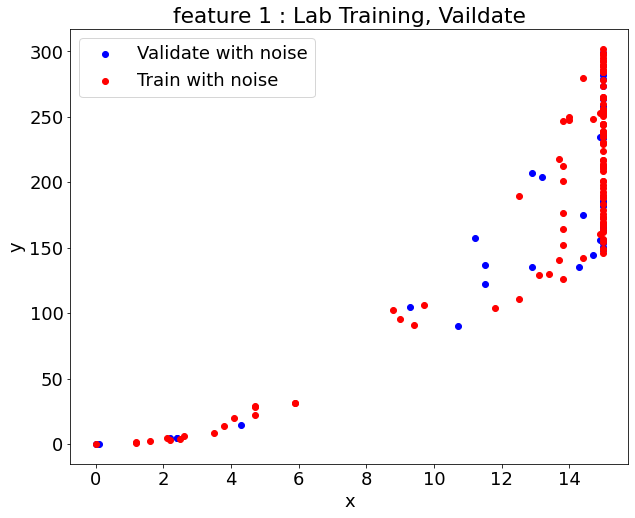

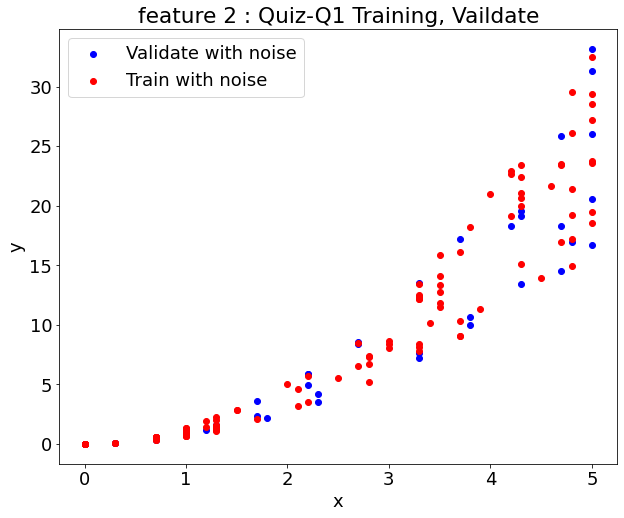

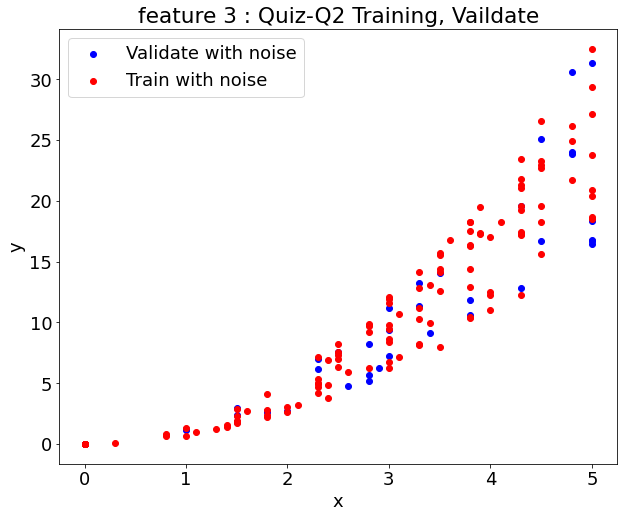

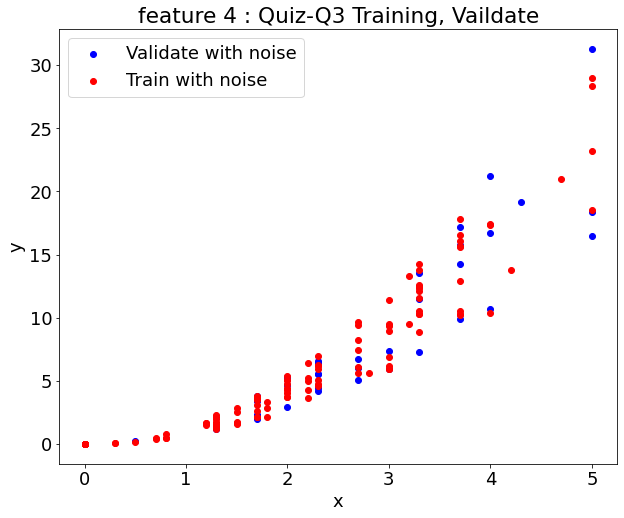

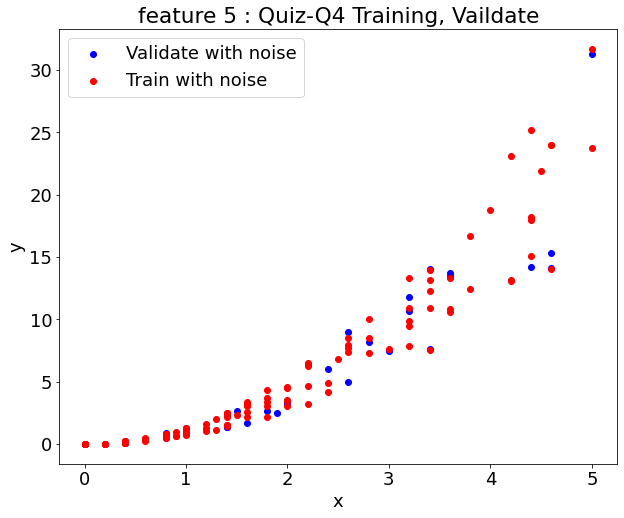

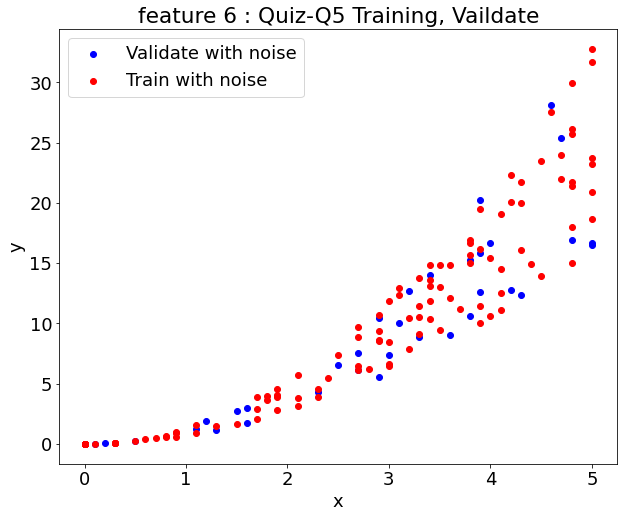

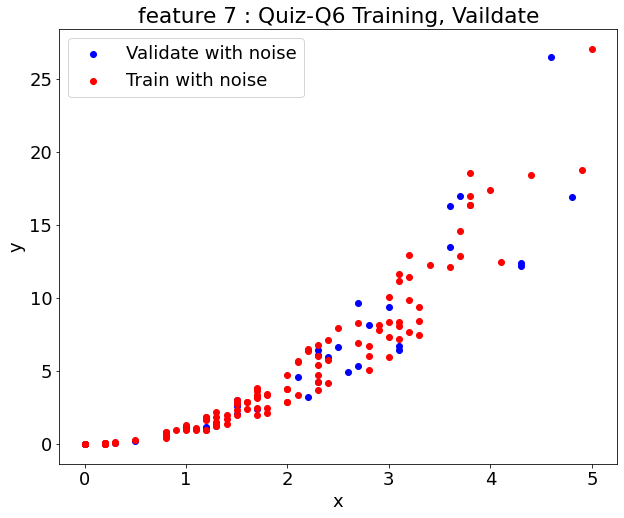

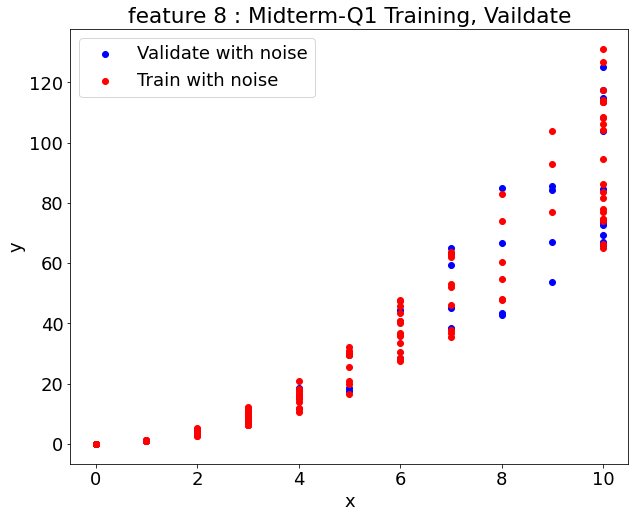

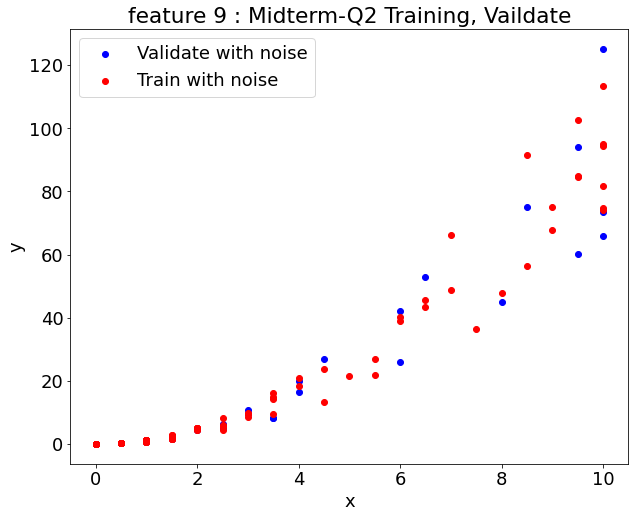

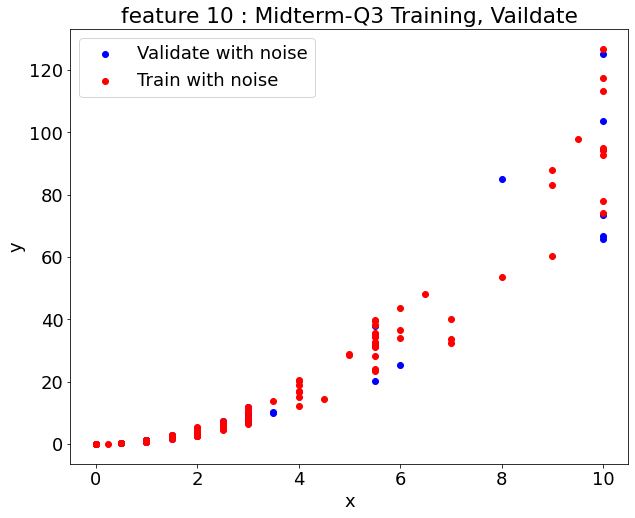

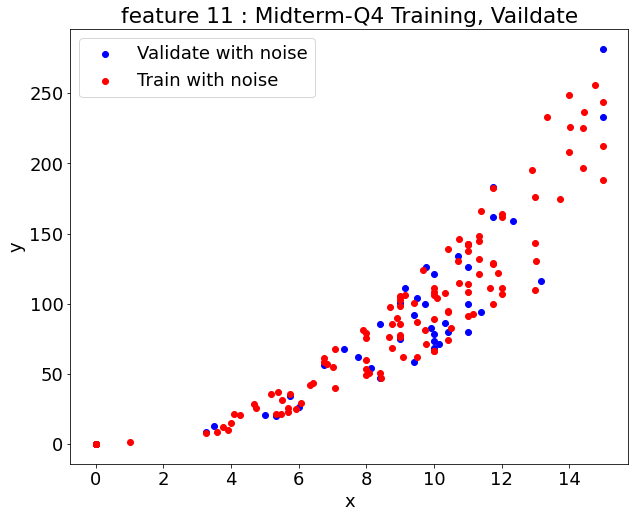

In [ ]:
count = 0
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X= data[i].values
  count+=1
  from sklearn.model_selection import train_test_split
  X_train, X_valid, y_train, y_valid = train_test_split(
  X, y, test_size=0.25625, random_state=1)
  import matplotlib
  import matplotlib.pyplot as plt
  import numpy as np
  font = {'size' : 18}
  matplotlib.rc('font', **font)
  np.random.seed(1)
  y_ideal =  X_train**2 + 0
  y_train = y_ideal + (0.7 * y_ideal*(np.random.sample((X_train.shape))-0.5))
  x_ideal = X_train
  y_idea_val = X_valid**2+0
  y_valid = y_idea_val + (0.7 * y_idea_val*(np.random.sample((X_valid.shape))-0.5))
  fig, ax = plt.subplots(1,1,figsize=(10,8))
  ax.set_title(f"feature {count} : {i} Training, Vaildate")
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.scatter(X_valid, y_valid,   color = "blue", label="Validate with noise")
  ax.scatter(X_train, y_train, color = "red",  label="Train with noise")
  ax.legend(loc='upper left')
  plt.show()
  plt.close('all')

## Feature Engineering

* POLYNOMINAL 
ด้วย การใช้ regression การ regression จะทำให้ค่าที่ออกมาเป็นทศนิยมเเละไม่เหมาะสมที่จะนำมาใช้ Predict เเต่สามารถนำมาตรวจสอบ model ได้ว่ามีความ underfit หรือ overfit มากน้อยเเค่ไหน

In [ ]:
count = 0
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X= data[i].values
  count+=1
  from sklearn.model_selection import train_test_split
  X_train_inpoly, X_valid_inpoly, y_train_inpoly, y_valid_inpoly = train_test_split(
  X, y, test_size=0.25625, random_state=1)
  from sklearn.linear_model import LinearRegression, Ridge
  from sklearn.preprocessing import StandardScaler  # z-score normalization
  from sklearn.preprocessing import PolynomialFeatures  # polynomial feature
  from sklearn.metrics import mean_squared_error  # mean squared error
  import numpy as np
  import math, copy
  np.set_printoptions(precision=3)  # reduced display precision on numpy arrays
  # Linear regression model
  regularization = False
  if regularization:
      reg_deg = 0.001  # or lambda in the equation
      linear_model = Ridge(alpha=reg_deg)  # with regularization
  else:
      linear_model = LinearRegression()    # with out regularization
      # Polynomial features
  poly_deg = 6
  poly = PolynomialFeatures(degree=poly_deg, include_bias=False)
  # Feature scaling
  scaler = StandardScaler()
  X_train_poly = poly.fit_transform(X_train_inpoly.reshape(-1,1))
  X_train_scaled_poly = scaler.fit_transform(X_train_poly)
  linear_model.fit(X_train_scaled_poly, y_train_inpoly)
  yhat = linear_model.predict(X_train_scaled_poly)
  err_train = mean_squared_error(y_true=y_train_inpoly, y_pred=yhat)
  X_valid_poly = poly.transform(X_valid_inpoly.reshape(-1,1))  # polynomial features
  X_valid_scaled_poly = scaler.transform(X_valid_poly)  # feature scaling
  yhat_vaild_poty = linear_model.predict(X_valid_scaled_poly)     # prediction
  err_vaild = mean_squared_error(y_valid_inpoly, yhat_vaild_poty)
  print(f" feature {count} : {i} training err {err_train:0.2f}, Vaild err {err_vaild:0.2f}")

 feature 1 : Lab training err 2.27, Vaild err 3.10
 feature 2 : Quiz-Q1 training err 2.06, Vaild err 2.53
 feature 3 : Quiz-Q2 training err 1.97, Vaild err 1.95
 feature 4 : Quiz-Q3 training err 1.87, Vaild err 2.92
 feature 5 : Quiz-Q4 training err 1.54, Vaild err 2.14
 feature 6 : Quiz-Q5 training err 1.80, Vaild err 2.62
 feature 7 : Quiz-Q6 training err 2.35, Vaild err 2.93
 feature 8 : Midterm-Q1 training err 1.91, Vaild err 3.32
 feature 9 : Midterm-Q2 training err 1.93, Vaild err 2.99
 feature 10 : Midterm-Q3 training err 1.85, Vaild err 3.06
 feature 11 : Midterm-Q4 training err 1.90, Vaild err 3.78


* กราฟ ตรวจสอบ model ของเรา overfit หรือ underfit ในเเต่ละ feature โดยการ วนลูปเเละใช้ PolynomialFeatures ในการ polt graph เพื่อดูความ overfit เเละ underfit 

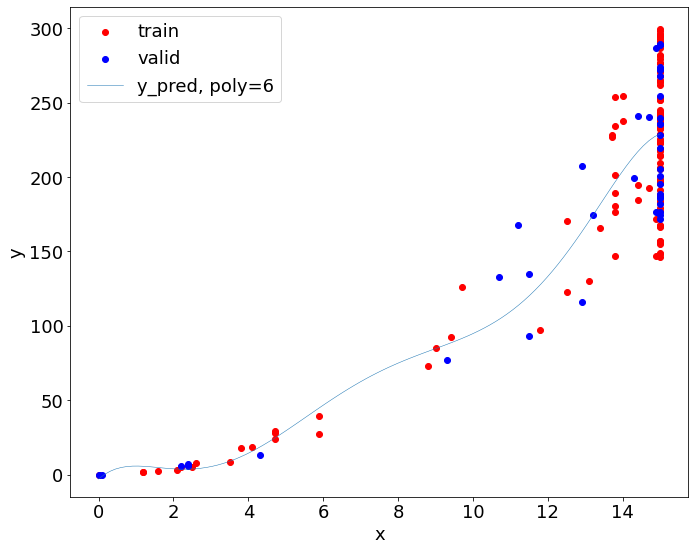

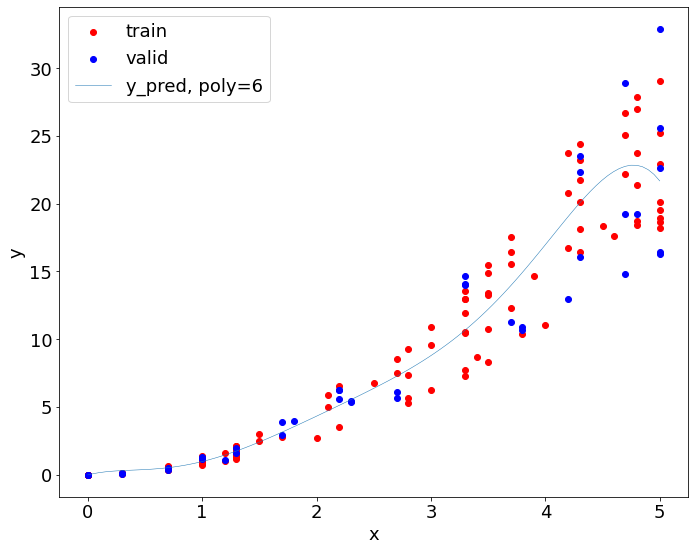

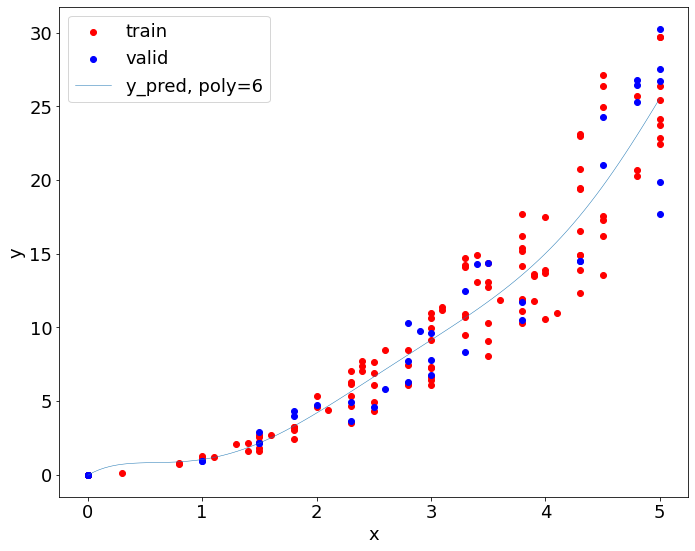

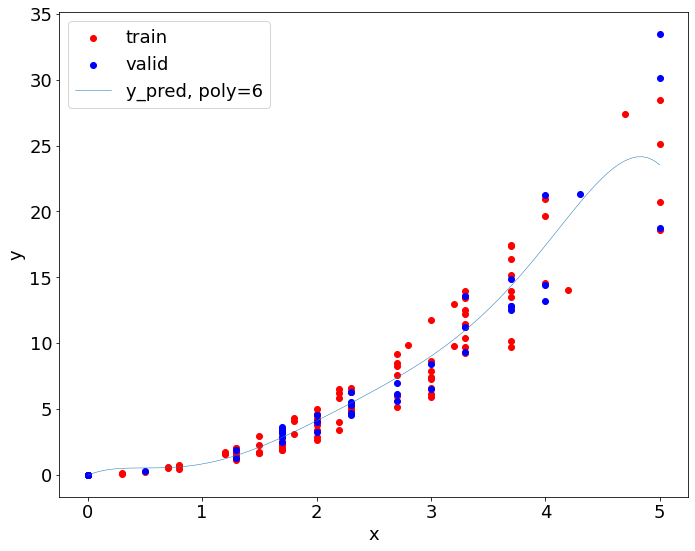

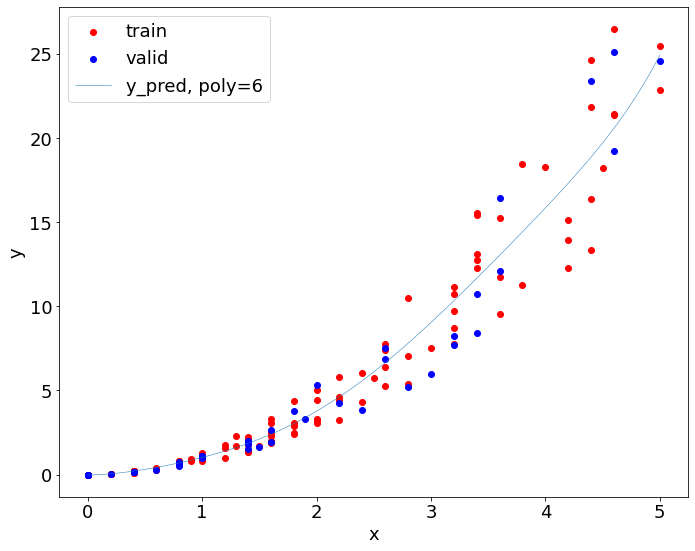

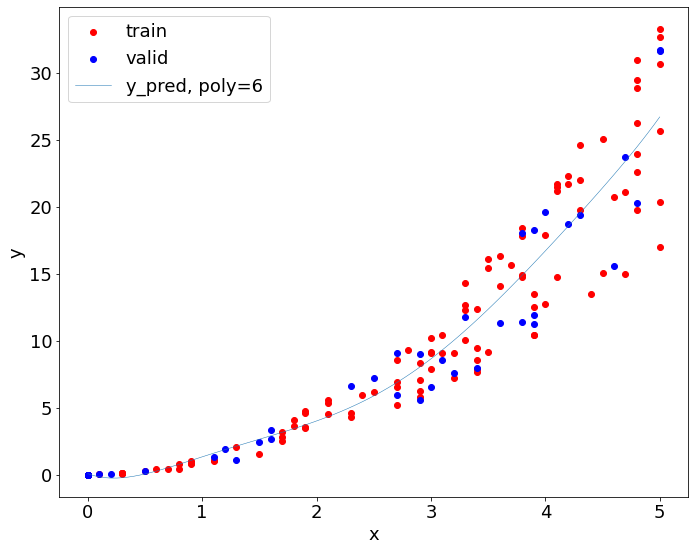

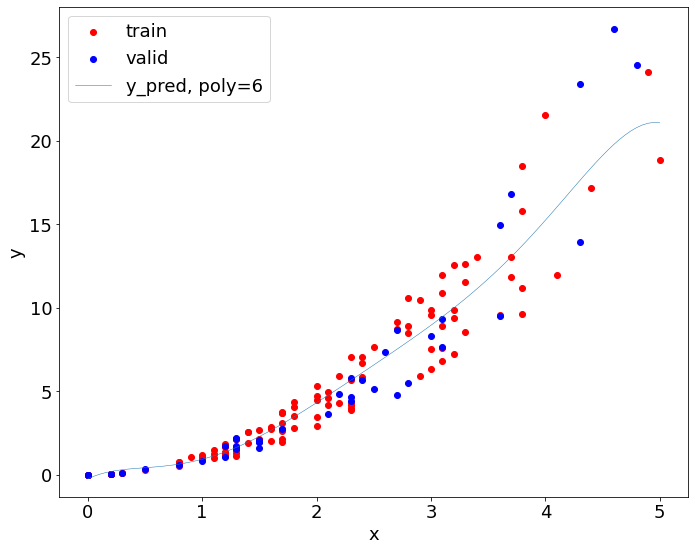

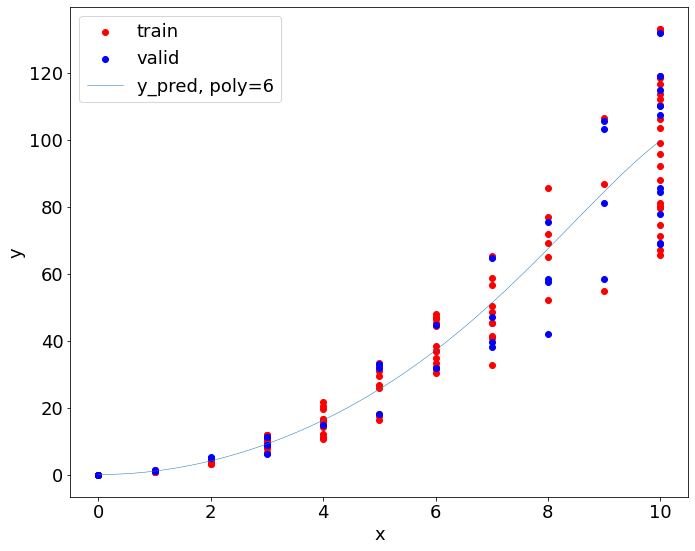

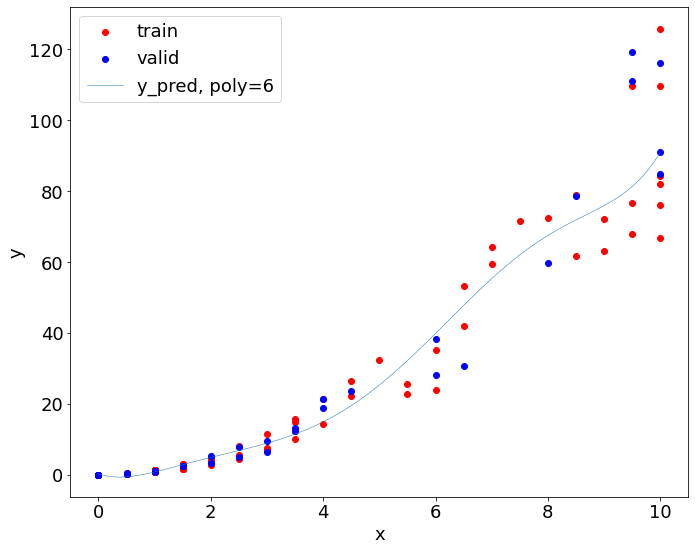

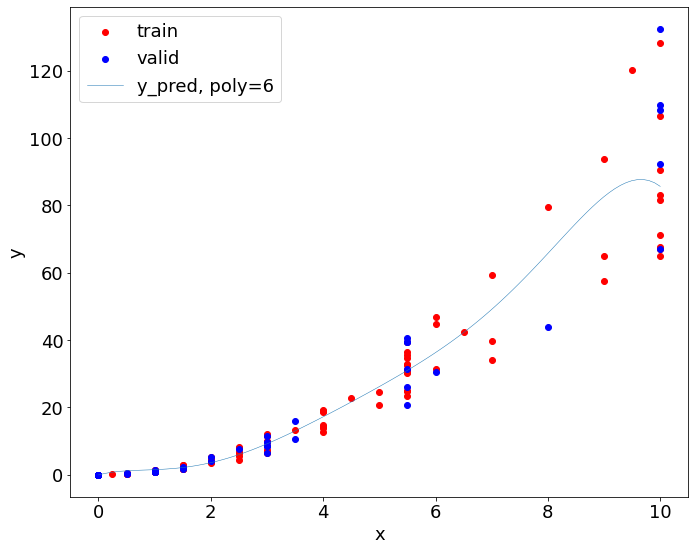

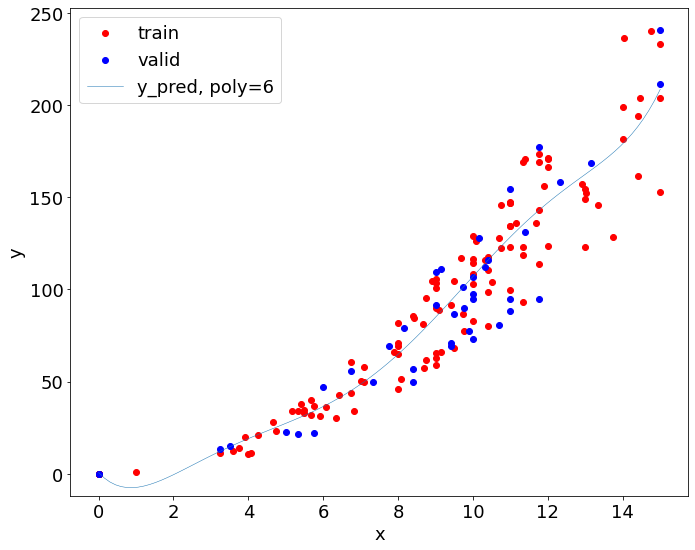

In [ ]:
count = 0
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X= data[i].values
  count+=1
  from sklearn.model_selection import train_test_split
  X_train_inpoly, X_valid_inpoly, y_train_inpoly, y_valid_inpoly = train_test_split(
  X, y, test_size=0.25625, random_state=1)
  from sklearn.linear_model import LinearRegression, Ridge
  from sklearn.preprocessing import StandardScaler  # z-score normalization
  from sklearn.preprocessing import PolynomialFeatures  # polynomial feature
  from sklearn.metrics import mean_squared_error  # mean squared error
  import numpy as np
  import math, copy
  np.set_printoptions(precision=3)  # reduced display precision on numpy arrays
  # Linear regression model
  regularization = False
  if regularization:
      reg_deg = 0.01  # or lambda in the equation
      linear_model = Ridge(alpha=reg_deg)  # with regularization
  else:
      linear_model = LinearRegression()    # with out regularization
      # Polynomial features
  poly_deg = 6
  poly = PolynomialFeatures(degree=poly_deg, include_bias=False)
  # Feature scaling
  scaler = StandardScaler()
  y_ideal_inpoly =  X_train_inpoly**2 + 0
  y_train_inpoly = y_ideal_inpoly + (0.7 * y_ideal_inpoly*(np.random.sample((X_train_inpoly.shape))-0.5))
  x_ideal_inpoly = X_train_inpoly
  y_idea_val_inpoly = X_valid_inpoly**2+0
  y_valid_inpoly = y_idea_val_inpoly + (0.7 * y_idea_val_inpoly*(np.random.sample((X_valid_inpoly.shape))-0.5))
  X_train_poly = poly.fit_transform(X_train_inpoly.reshape(-1,1))
  X_train_scaled_poly = scaler.fit_transform(X_train_poly)
  linear_model.fit(X_train_scaled_poly, y_train_inpoly)
  yhat = linear_model.predict(X_train_scaled_poly)
  X_valid_poly = poly.transform(X_valid_inpoly.reshape(-1,1))  # polynomial features
  X_valid_scaled_poly = scaler.transform(X_valid_poly)  # feature scaling
  yhat_vaild_poty = linear_model.predict(X_valid_scaled_poly)     # prediction
  
  # Plot predictions over data range to visialize the model function f(x)
  _X = np.linspace(0,int(X.max()),100)  # predict values for plot
  _X_poly = poly.transform(_X.reshape(-1,1))
  _X_scaled_poly = scaler.transform(_X_poly)
  _y_pred = linear_model.predict(_X_scaled_poly)
  fig, ax = plt.subplots(1,1, figsize=(10,8))
  ax.set_xlabel("x")
  ax.set_ylabel("y")

  ax.scatter(X_train_inpoly, y_train_inpoly, color = "red",  label="train")
  ax.scatter( X_valid_inpoly, y_valid_inpoly,   color = "blue", label="valid")
  ax.set_xlim(ax.get_xlim())
  ax.set_ylim(ax.get_ylim())

  # Visialize the model function f(x)
  if regularization:
      ax.plot(_X, _y_pred,  lw=0.5, label=f"y_pred, poly={poly_deg} lambda={reg_deg}")
  else:
      ax.plot(_X, _y_pred,  lw=0.5, label=f"y_pred, poly={poly_deg}")
  ax.legend(loc='upper left')
  plt.tight_layout()
  plt.show()
  plt.close('all')

## Validation set, Learning Curve,

* Linear Regression Model

In [ ]:
class LinearRegPolyModel:

    def __init__(self, poly_deg, regularization=False, lambda_=0):
        if regularization:
            # with L2 regularization
            self.linear_model = Ridge(alpha=lambda_)
        else:
            # without regularization
            self.linear_model = LinearRegression()
        self.poly = PolynomialFeatures(poly_deg, include_bias=False)
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Reshape to add feature dimension from (m, ) to (m, 1)
        X_poly = self.poly.fit_transform(X.reshape(-1,1))
        X_poly_scale = self.scaler.fit_transform(X_poly)
        self.linear_model.fit(X_poly_scale, y_train)

    def predict(self, X):
        # Reuse `poly` and `scaler` from the fit (i.e, the training)
        X_mapped = self.poly.transform(X.reshape(-1,1))
        X_mapped_scaled = self.scaler.transform(X_mapped)
        yhat = self.linear_model.predict(X_mapped_scaled)
        return(yhat)

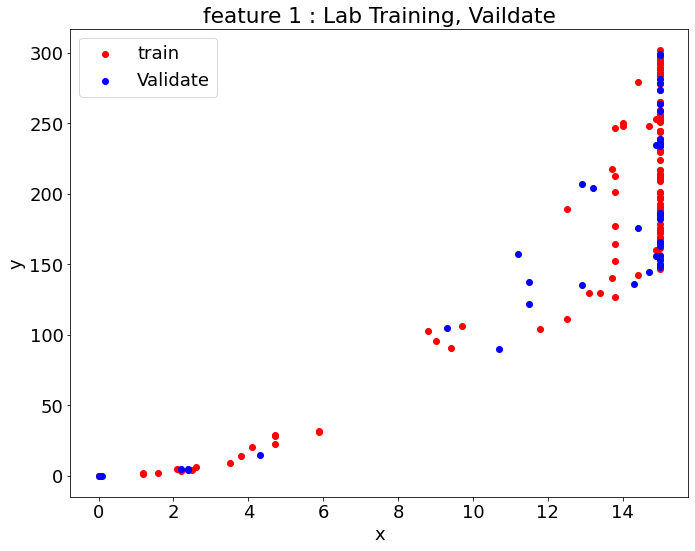

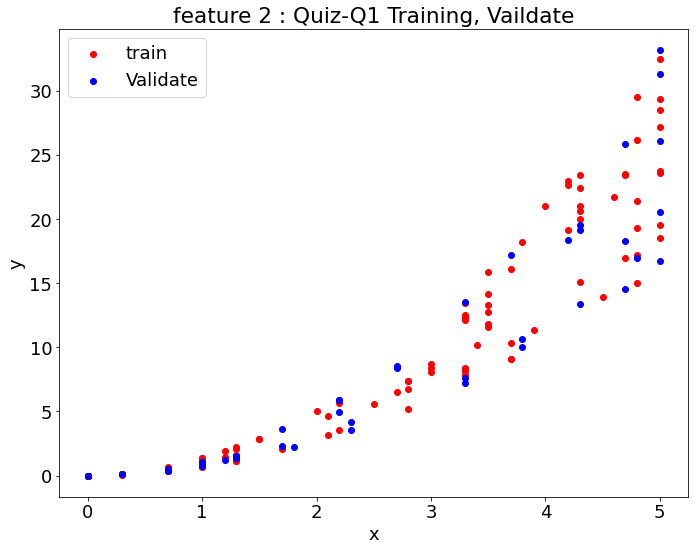

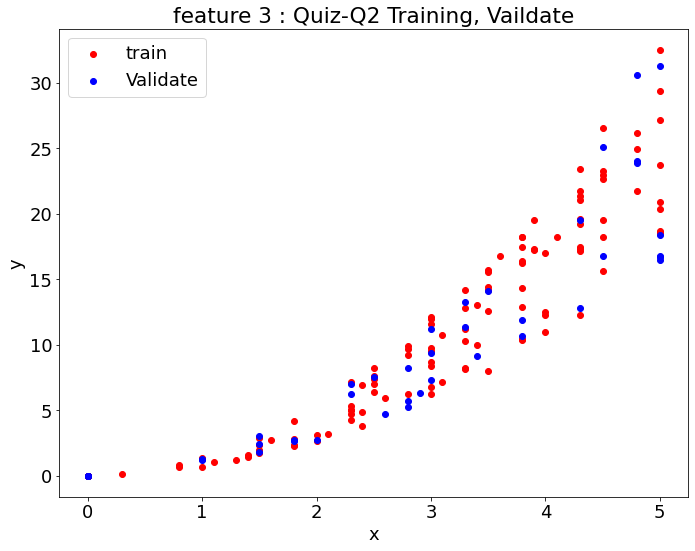

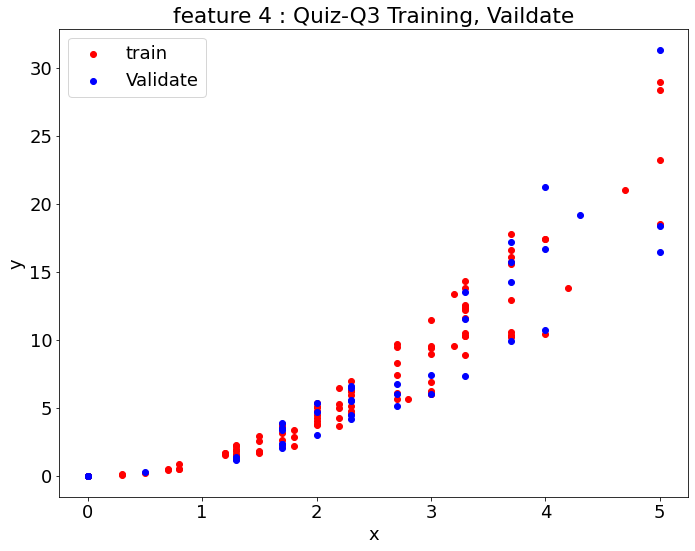

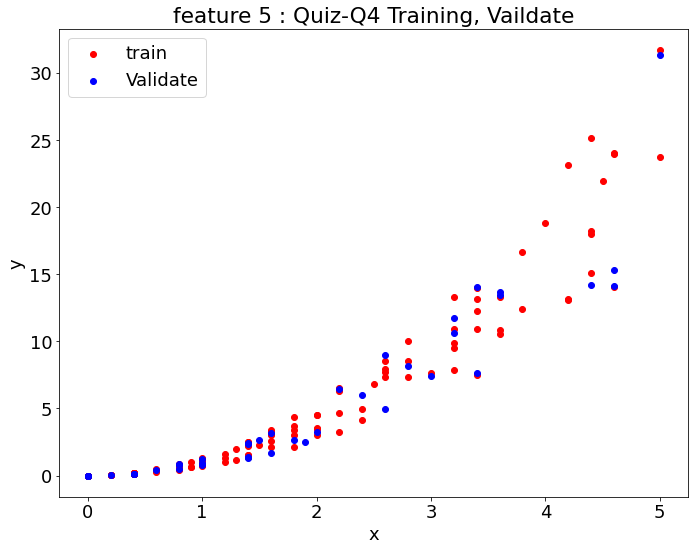

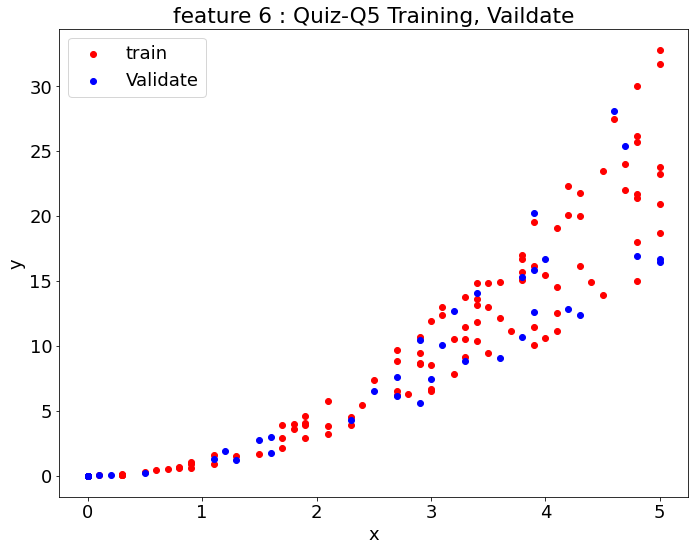

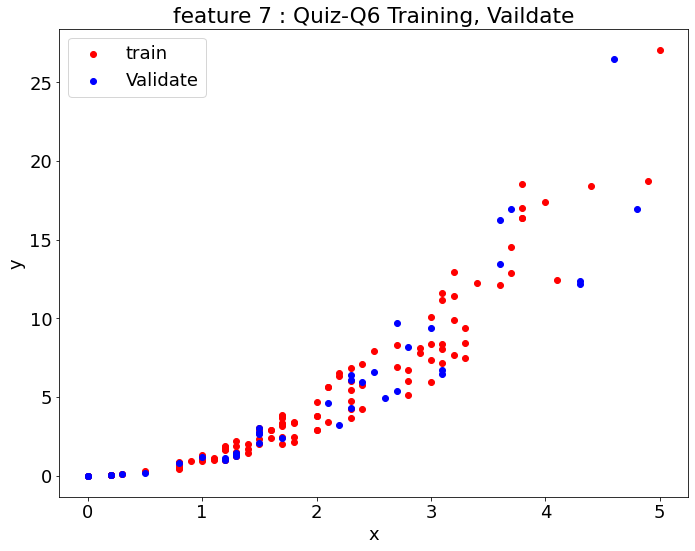

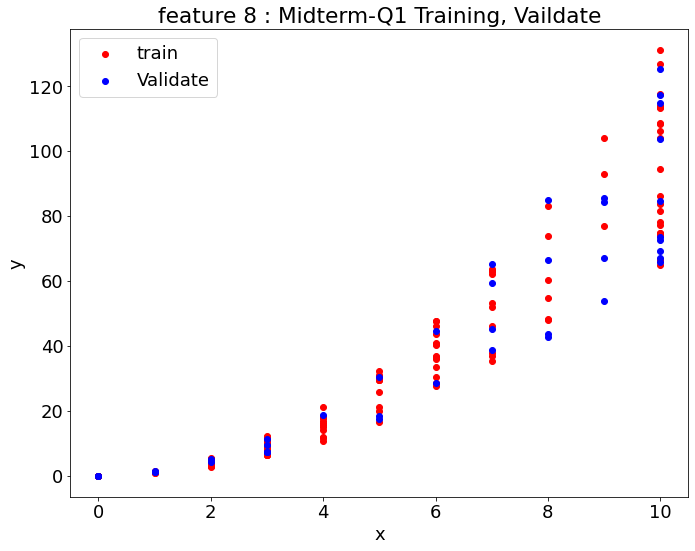

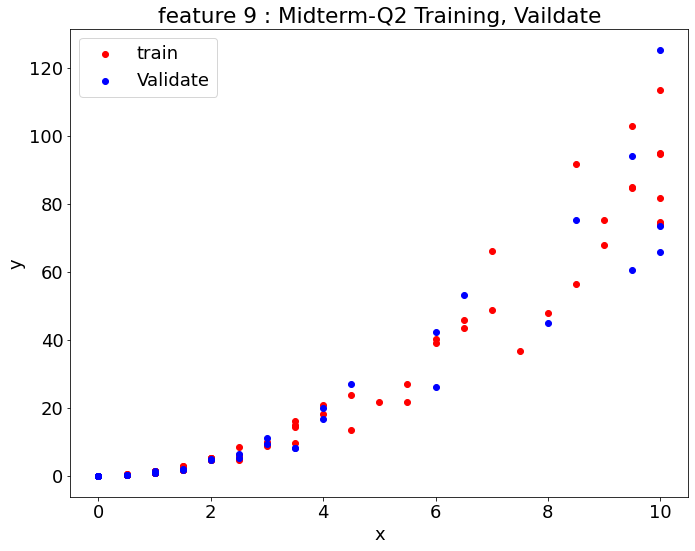

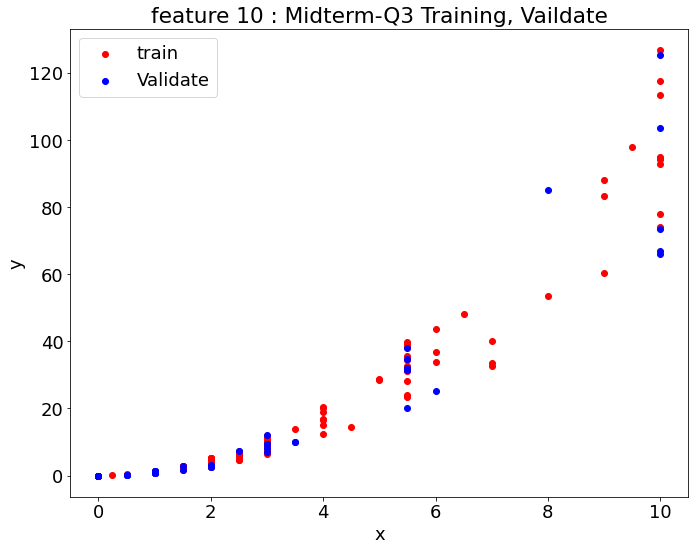

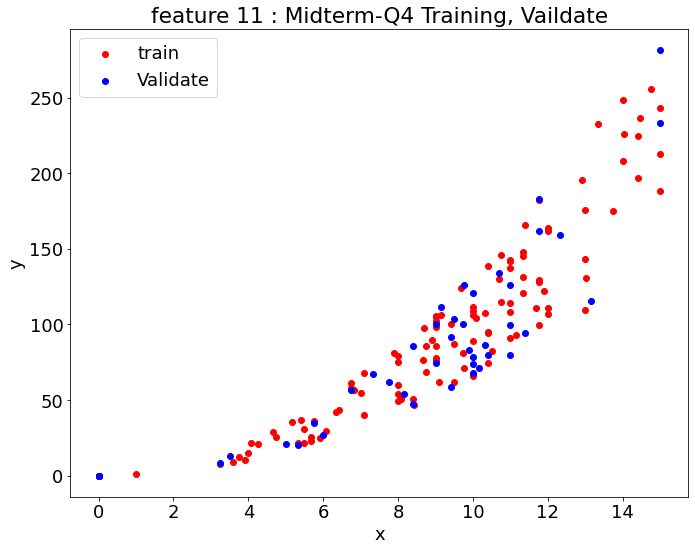

In [ ]:

count = 0
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X= data[i].values
  count+=1
  
  from sklearn.model_selection import train_test_split

  X_train_LRPM, X_valid_LRPM, y_train_LRPM, y_valid_LRPM = train_test_split(
  X, y, test_size=0.25625, random_state=1)
  np.random.seed(1)
  y_ideal_LRPM =  X_train_LRPM**2 + 0
  y_train_LRPM = y_ideal_LRPM + (0.7 * y_ideal_LRPM*(np.random.sample((X_train_LRPM.shape))-0.5))
  x_ideal_LRPM = X_train
  y_idea_val_LRPM = X_valid_LRPM**2+0
  y_valid_LRPM = y_idea_val_LRPM + (0.7 * y_idea_val_LRPM*(np.random.sample((X_valid_LRPM.shape))-0.5))
  lmodel1 = LinearRegPolyModel(10, False, 0) 
  lmodel1.fit(X_train_LRPM, y_train_LRPM)
  fig, ax = plt.subplots(1,1, figsize=(10,8))
  ax.set_title(f"feature {count} : {i} Training, Vaildate")
  ax.set_xlabel("x")
  ax.set_ylabel("y")

  ax.scatter(X_train_LRPM, y_train_LRPM, color = "red",  label="train")
  ax.scatter(X_valid_LRPM, y_valid_LRPM,   color = "blue", label="Validate")
  ax.set_xlim(ax.get_xlim())
  ax.set_ylim(ax.get_ylim())

 
  ax.legend(loc='upper left')
  plt.tight_layout()
  plt.show()
  plt.close('all')


* the errors vs the degree of polynomial
สังเกตจากการเมื่อ degree มากขึ้น error ก็จะยิ่งมากขึ้น ในหลายๆ feature 

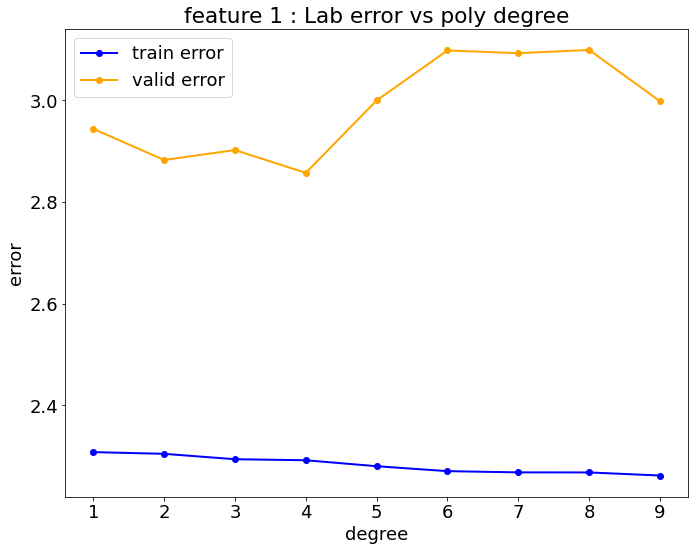

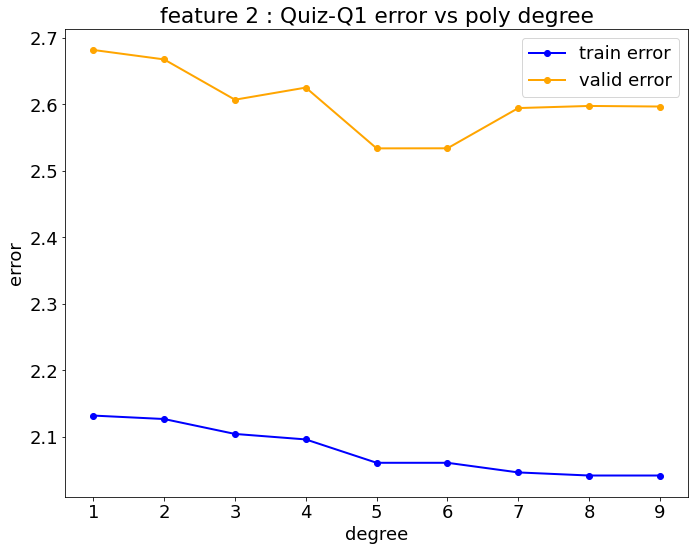

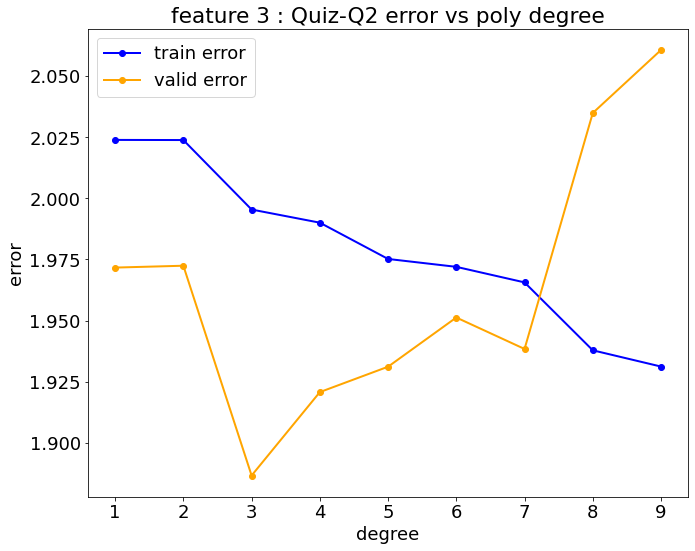

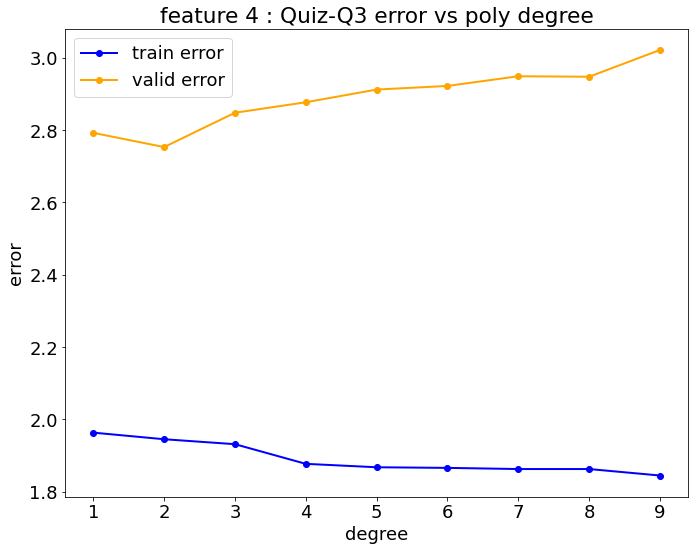

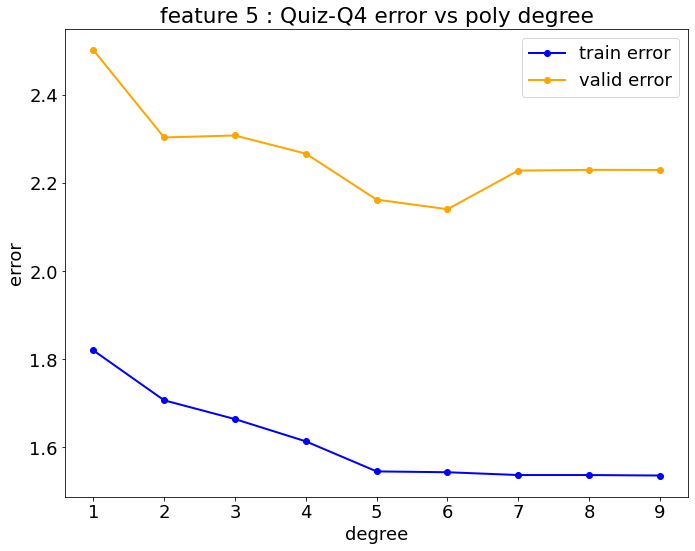

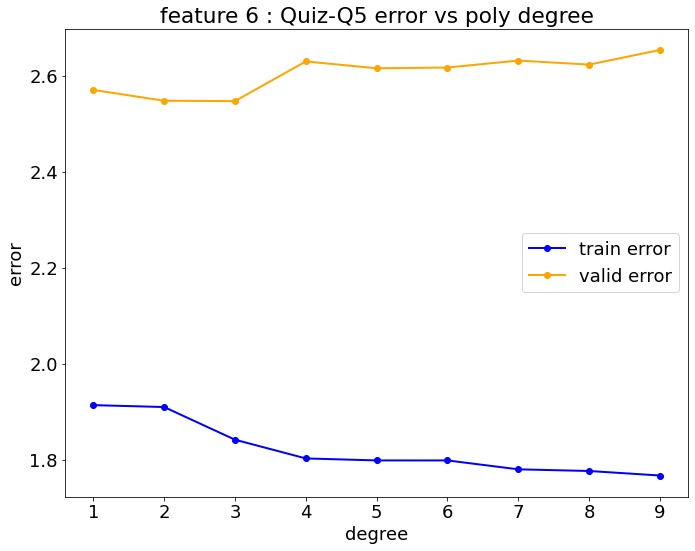

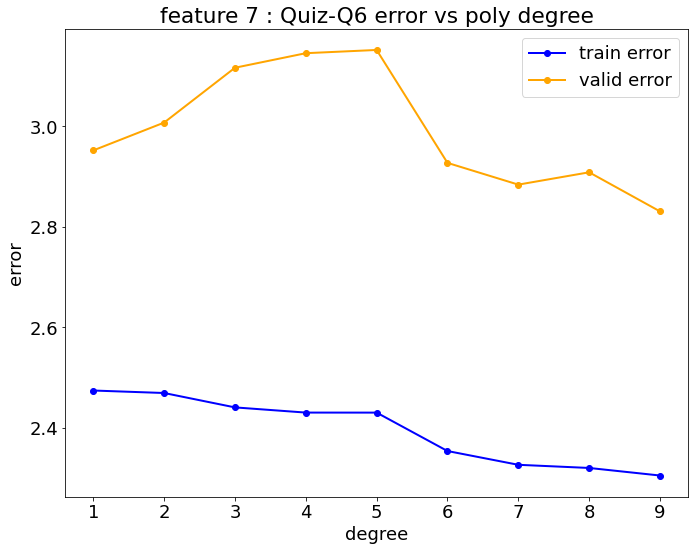

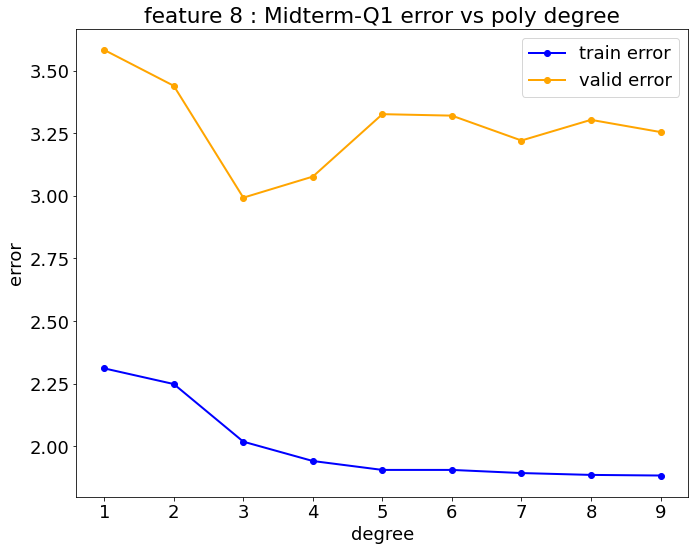

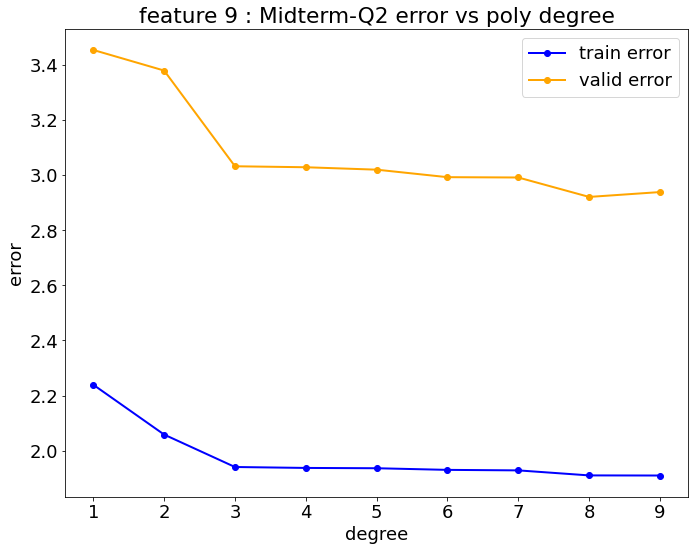

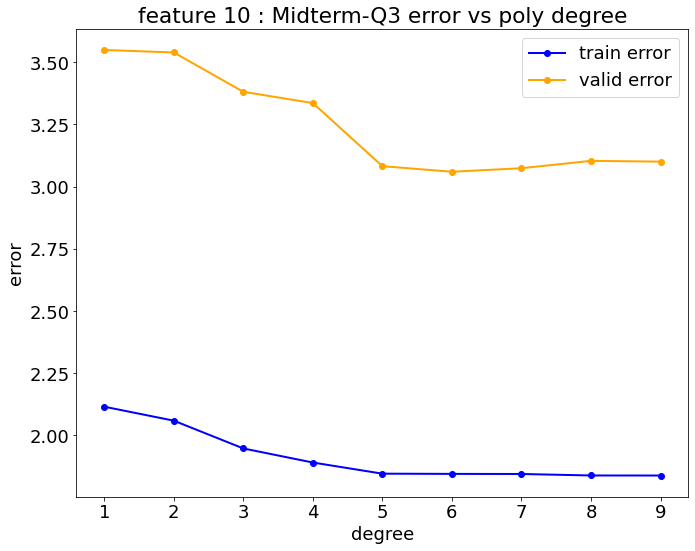

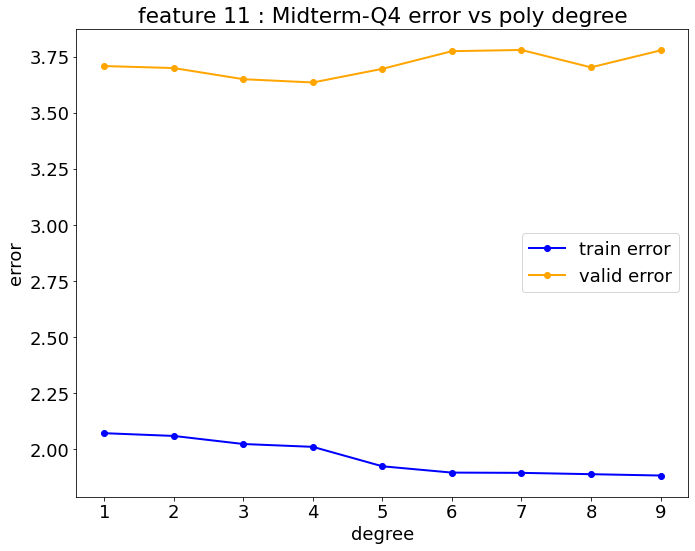

In [ ]:
count = 0
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X= data[i].values
  count+=1
  max_degree = 9
  err_train = np.zeros(max_degree)    
  err_valid = np.zeros(max_degree)      
  x = np.linspace(0,int(X.max()),100)  
  y_model_line = np.zeros((100,max_degree))  # columns are lines to plot
  from sklearn.model_selection import train_test_split

  X_train, X_valid, y_train, y_valid = train_test_split(
  X, y, test_size=0.25625, random_state=1)
  for degree in range(max_degree):
     
      lmodel = LinearRegPolyModel(degree+1)  # +1 to convert from 0-8 to 1-9
      lmodel.fit(X_train, y_train)
      y_preds = lmodel.predict(X_train)
      err_train[degree] = mean_squared_error(y_train, y_preds)
      y_preds = lmodel.predict(X_valid)
      err_valid[degree] = mean_squared_error(y_valid, y_preds)
      y_model_line[:,degree] = lmodel.predict(x)
  fig, ax = plt.subplots(1,1, figsize=(10,8))

  cpts = list(range(1, max_degree+1))
  ax.plot(
      cpts, err_train, marker='o', label="train error", lw=2, color="blue")
  ax.plot(
      cpts, err_valid,    marker='o', label="valid error", lw=2, color="orange")
  ax.set_xlabel("degree")
  ax.set_ylabel("error")
  ax.legend()
  ax.set_title(f"feature {count} : {i} error vs poly degree")
  plt.tight_layout()
  plt.show()
  plt.close('all')

In [ ]:
count = 0
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X= data[i].values
  count+=1
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25625, random_state=1)# YOUR CODE HERE
  y_preds =  lmodel.predict(X_train) 
  mse_train = mean_squared_error(y_train, y_preds)
  print(f"feature {count} : {i}  = MSE train: {mse_train:.4f}")


feature 1 : Lab  = MSE train: 6.3495
feature 2 : Quiz-Q1  = MSE train: 6.7573
feature 3 : Quiz-Q2  = MSE train: 6.0180
feature 4 : Quiz-Q3  = MSE train: 5.4288
feature 5 : Quiz-Q4  = MSE train: 5.4766
feature 6 : Quiz-Q5  = MSE train: 6.1131
feature 7 : Quiz-Q6  = MSE train: 5.5089
feature 8 : Midterm-Q1  = MSE train: 2.9465
feature 9 : Midterm-Q2  = MSE train: 5.3035
feature 10 : Midterm-Q3  = MSE train: 4.8488
feature 11 : Midterm-Q4  = MSE train: 1.8822


# Evaluation
predict outputs ด้วย predict และ evaluate model ที่ได้ด้วย classification_report

## LogisticRegression

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X = data[[i]].values
  model = LogisticRegression()
  model = model.fit(X, y)
  probabilities = model.predict_proba(X)
  predictions = model.predict(X)
  print(i)
  #print('Prob = ', probabilities, ', Prediction = ', predictions)
  print(classification_report(y, predictions))
  print('--------------------------------------------------------------')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

Lab
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        23
           3       0.43      0.24      0.31        25
           4       0.25      0.91      0.39        34
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         6
           7       0.50      0.79      0.61        14

    accuracy                           0.30       160
   macro avg       0.15      0.24      0.16       160
weighted avg       0.16      0.30      0.18       160

--------------------------------------------------------------
Quiz-Q1
              precision    recall  f1-score   support

           0       0.51      0.88      0.65        24
           1       0.48      0.59      0.53        27
           2       0.50      0.04      0.08        23
           3       0.25      0.16      0.20        25
   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

##DecisionTreeClassifier

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X = data[[i]].values
  from sklearn.tree import DecisionTreeClassifier
  for j in range  (2,6):
    decisiontree = DecisionTreeClassifier(criterion='gini', max_depth=j, min_samples_split=j )
    decisiontree.fit(X, y)
    predictions_decision = decisiontree.predict(X)
    print(f"{i}, max={j}")
    print(classification_report(y, predictions_decision))
    print('--------------------------------------------------------------')

Lab, max=2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        23
           3       0.41      0.52      0.46        25
           4       0.24      0.74      0.36        34
           5       0.50      0.71      0.59         7
           6       0.00      0.00      0.00         6
           7       0.75      0.64      0.69        14

    accuracy                           0.33       160
   macro avg       0.24      0.33      0.26       160
weighted avg       0.20      0.33      0.23       160

--------------------------------------------------------------
Lab, max=3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        27
           2       1.00      0.09      0.16        23
           3       0.41      0.52      0.46    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.50      0.44      0.47        27
           2       0.56      0.61      0.58        23
           3       0.41      0.76      0.54        25
           4       0.65      0.44      0.53        34
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         6
           7       0.67      0.71      0.69        14

    accuracy                           0.56       160
   macro avg       0.44      0.47      0.44       160
weighted avg       0.53      0.56      0.53       160

--------------------------------------------------------------
Quiz-Q4, max=5
              precision    recall  f1-score   support

           0       0.68      0.88      0.76        24
           1       0.67      0.30      0.41        27
           2       0.63      0.52      0.57        23
           3       0.44      0.72      0.55        25


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

## RandomForestClassifier

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X = data[[i]].values
  from sklearn.ensemble import RandomForestClassifier
  for j in range  (2,6):
    forest = RandomForestClassifier(n_estimators=2*j,
      criterion='entropy',
      max_depth=j
       )
    forest.fit(X, y)
    predictions_decision = forest.predict(X)
    print(f"{i}, max={j}")
    print(classification_report(y, predictions_decision))
    print('--------------------------------------------------------------')

Lab, max=2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        23
           3       0.47      0.32      0.38        25
           4       0.25      0.88      0.39        34
           5       0.67      0.29      0.40         7
           6       0.33      0.33      0.33         6
           7       0.69      0.64      0.67        14

    accuracy                           0.32       160
   macro avg       0.30      0.31      0.27       160
weighted avg       0.23      0.32      0.23       160

--------------------------------------------------------------
Lab, max=3
              precision    recall  f1-score   support

           0       0.23      0.96      0.37        24
           1       0.43      0.11      0.18        27
           2       1.00      0.09      0.16        23
           3       0.50      0.44      0.47    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Quiz-Q1, max=4
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        24
           1       0.47      0.59      0.52        27
           2       0.44      0.35      0.39        23
           3       0.57      0.32      0.41        25
           4       0.35      0.50      0.41        34
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         6
           7       0.36      0.29      0.32        14

    accuracy                           0.46       160
   macro avg       0.35      0.37      0.35       160
weighted avg       0.43      0.46      0.43       160

--------------------------------------------------------------
Quiz-Q1, max=5
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.56      0.52      0.54        27
           2       0.56      0.39      0.46        23
           3       0.40      0.76      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Quiz-Q2, max=5
              precision    recall  f1-score   support

           0       0.62      0.88      0.72        24
           1       0.54      0.48      0.51        27
           2       0.57      0.17      0.27        23
           3       0.50      0.40      0.44        25
           4       0.42      0.65      0.51        34
           5       0.67      0.57      0.62         7
           6       0.00      0.00      0.00         6
           7       0.56      0.64      0.60        14

    accuracy                           0.52       160
   macro avg       0.48      0.47      0.46       160
weighted avg       0.51      0.52      0.49       160

--------------------------------------------------------------
Quiz-Q3, max=2
              precision    recall  f1-score   support

           0       0.49      0.92      0.64        24
           1       0.55      0.22      0.32        27
           2       0.00      0.00      0.00        23
           3       0.36      0.84      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Quiz-Q4, max=4
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        24
           1       0.62      0.30      0.40        27
           2       0.59      0.43      0.50        23
           3       0.50      0.36      0.42        25
           4       0.46      0.79      0.58        34
           5       0.40      0.29      0.33         7
           6       0.00      0.00      0.00         6
           7       0.67      0.71      0.69        14

    accuracy                           0.54       160
   macro avg       0.48      0.47      0.46       160
weighted avg       0.54      0.54      0.51       160

--------------------------------------------------------------
Quiz-Q4, max=5
              precision    recall  f1-score   support

           0       0.68      0.88      0.76        24
           1       0.65      0.41      0.50        27
           2       0.63      0.52      0.57        23
           3       0.46      0.64      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat


              precision    recall  f1-score   support

           0       0.92      0.50      0.65        24
           1       0.35      0.59      0.44        27
           2       0.70      0.30      0.42        23
           3       0.46      0.48      0.47        25
           4       0.40      0.53      0.46        34
           5       0.00      0.00      0.00         7
           6       0.33      0.33      0.33         6
           7       0.36      0.36      0.36        14

    accuracy                           0.45       160
   macro avg       0.44      0.39      0.39       160
weighted avg       0.50      0.45      0.45       160

--------------------------------------------------------------
Quiz-Q6, max=5
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.41      0.33      0.37        27
           2       0.52      0.48      0.50        23
           3       0.40      0.68      0.51        25

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Midterm-Q2, max=4
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.43      0.48      0.46        27
           2       0.64      0.30      0.41        23
           3       0.29      0.64      0.40        25
           4       0.40      0.50      0.44        34
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        14

    accuracy                           0.44       160
   macro avg       0.33      0.33      0.32       160
weighted avg       0.43      0.44      0.41       160

--------------------------------------------------------------
Midterm-Q2, max=5
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.48      0.37      0.42        27
           2       0.57      0.35      0.43        23
           3       0.38      0.24

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Midterm-Q4, max=4
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        24
           1       0.45      0.63      0.52        27
           2       0.47      0.65      0.55        23
           3       0.64      0.36      0.46        25
           4       0.50      0.47      0.48        34
           5       0.00      0.00      0.00         7
           6       0.33      0.67      0.44         6
           7       1.00      0.64      0.78        14

    accuracy                           0.53       160
   macro avg       0.51      0.51      0.49       160
weighted avg       0.55      0.53      0.52       160

--------------------------------------------------------------
Midterm-Q4, max=5
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.39      0.63      0.48        27
           2       0.52      0.61      0.56        23
           3       0.62      0.40

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBClassifier

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
num_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
for i in num_cols :
  X = data[[i]].values
  from xgboost import XGBClassifier
  for j in range  (2,6):
    XGB = XGBClassifier(n_estimators=2*j,max_depth=j)
    XGB.fit(X, y)
    predictions_decision = XGB.predict(X)
    print(f"{i}, max={j}")
    print(classification_report(y, predictions_decision))
    print('--------------------------------------------------------------')

Lab, max=2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        27
           2       1.00      0.09      0.16        23
           3       0.41      0.52      0.46        25
           4       0.24      0.74      0.36        34
           5       0.50      0.71      0.59         7
           6       0.00      0.00      0.00         6
           7       0.75      0.64      0.69        14

    accuracy                           0.34       160
   macro avg       0.36      0.34      0.28       160
weighted avg       0.35      0.34      0.26       160

--------------------------------------------------------------
Lab, max=3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.50      0.07      0.13        27
           2       1.00      0.09      0.16        23
           3       0.50      0.48      0.49    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Quiz-Q2, max=2
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.00      0.00      0.00        27
           2       0.41      0.52      0.46        23
           3       0.00      0.00      0.00        25
           4       0.34      0.97      0.50        34
           5       0.67      0.29      0.40         7
           6       0.00      0.00      0.00         6
           7       0.64      0.50      0.56        14

    accuracy                           0.43       160
   macro avg       0.36      0.36      0.33       160
weighted avg       0.33      0.43      0.34       160

--------------------------------------------------------------
Quiz-Q2, max=3
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.52      0.41      0.46        27
           2       0.45      0.39      0.42        23
           3       0.71      0.20      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        24
           1       0.00      0.00      0.00        27
           2       0.53      0.43      0.48        23
           3       0.43      0.76      0.55        25
           4       0.52      0.68      0.59        34
           5       0.00      0.00      0.00         7
           6       0.40      0.33      0.36         6
           7       0.67      0.71      0.69        14

    accuracy                           0.53       160
   macro avg       0.40      0.47      0.42       160
weighted avg       0.42      0.53      0.46       160

--------------------------------------------------------------
Quiz-Q4, max=3
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        24
           1       0.50      0.07      0.13        27
           2       0.56      0.61      0.58        23
           3       0.50      0.60      0.55        25


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Midterm-Q2, max=4
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.43      0.44      0.44        27
           2       0.57      0.35      0.43        23
           3       0.38      0.24      0.29        25
           4       0.40      0.50      0.44        34
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         6
           7       0.30      0.86      0.44        14

    accuracy                           0.45       160
   macro avg       0.37      0.39      0.35       160
weighted avg       0.46      0.45      0.43       160

--------------------------------------------------------------
Midterm-Q2, max=5
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.43      0.37      0.40        27
           2       0.56      0.39      0.46        23
           3       0.38      0.24

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Midterm-Q4, max=4
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        24
           1       0.38      0.67      0.48        27
           2       0.50      0.70      0.58        23
           3       0.73      0.32      0.44        25
           4       0.62      0.47      0.53        34
           5       0.60      0.43      0.50         7
           6       0.80      0.67      0.73         6
           7       1.00      0.57      0.73        14

    accuracy                           0.55       160
   macro avg       0.65      0.56      0.58       160
weighted avg       0.61      0.55      0.55       160

--------------------------------------------------------------
Midterm-Q4, max=5
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        24
           1       0.40      0.67      0.50        27
           2       0.52      0.65      0.58        23
           3       0.80      0.32

#TEST SET

In [ ]:
 import pandas as pd
data_test = pd.read_csv('test.csv')
data_test.head()

,Title,Sec,Lab,Quiz-Q1,Quiz-Q2,Quiz-Q3,Quiz-Q4,Quiz-Q5,Quiz-Q6,Midterm-Q1,Midterm-Q2,Midterm-Q3,Midterm-Q4
0,MISS,2,15.0,2.0,3.0,1.2,2.2,3.1,1.2,4,0.0,4.0,11.0
1,MR.,3,14.4,0.0,4.5,5.0,5.0,5.0,4.8,10,10.0,9.5,12.0
2,MR.,2,15.0,3.3,4.3,3.2,3.6,5.0,2.9,10,7.5,10.0,8.0
3,MISS,3,15.0,1.7,2.3,2.2,1.6,2.7,0.3,3,0.0,0.0,10.0
4,MR.,1,15.0,2.8,3.3,1.5,1.8,1.5,1.8,7,0.5,0.5,8.0


ค่าของ train set 

In [ ]:
import pandas as pd
data = pd.read_csv('train.csv')
feat_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
X = data[feat_cols]

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(data['Grade'].values)
y = label_encoder.transform(data['Grade'])

คำนวณ test set

In [ ]:
feat_cols = ["Lab","Quiz-Q1","Quiz-Q2","Quiz-Q3","Quiz-Q4","Quiz-Q5","Quiz-Q6","Midterm-Q1","Midterm-Q2","Midterm-Q3","Midterm-Q4"]
X_test = data_test[feat_cols]

## Split test train valid 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
X, y, test_size=0.25625, random_state=1)

##Test of Logistic Regrassion model

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pandas
from sklearn.linear_model import (
    LogisticRegression,
)
#model1
inputs_Logistic  =X_train
labels_Logistic = y_train
model_Logistic = LogisticRegression()
model_Logistic = model_Logistic.fit(inputs_Logistic, labels_Logistic)
predictions_Logistic = model_Logistic.predict(X_test)
y_test_logitic = label_encoder.inverse_transform(predictions_Logistic)
print(y_test_logitic)
"""#เเปลงไฟล์ เอา output ออกมา
y_test_logitic = pandas.DataFrame(y_test_logitic,columns=["Grade"])
dataout = pandas.DataFrame(data=y_test_logitic)
dataout.to_csv("test_out.csv", encoding='utf-8', index=False)
#download file ลงเครื่อง
from google.colab import files
files.download("test_out.csv")"""

['C+' 'A' 'A' 'C+' 'C' 'C' 'A' 'C+' 'F' 'A' 'A' 'C' 'C' 'C' 'F' 'F' 'D'
 'B' 'B+' 'B+' 'C+' 'B+' 'A' 'D+' 'C+' 'D' 'B+' 'B' 'D' 'C+' 'A' 'C+' 'C+'
 'C+' 'C' 'B+' 'C' 'A' 'C+' 'B+' 'B']


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'#เเปลงไฟล์ เอา output ออกมา\ny_test_logitic = pandas.DataFrame(y_test_logitic,columns=["Grade"])\ndataout = pandas.DataFrame(data=y_test_logitic)\ndataout.to_csv("test_out.csv", encoding=\'utf-8\', index=False)\n#download file ลงเครื่อง\nfrom google.colab import files\nfiles.download("test_out.csv")'

##Test of Decision Tree Classifier model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5 )
decisiontree.fit(X_train, y_train)
predictions_decision = decisiontree.predict(X_test)
y_test_decision = label_encoder.inverse_transform(predictions_decision)
print(y_test_decision)
"""#เเปลงไฟล์ เอา output ออกมา
y_test_decision = pandas.DataFrame(y_test_decision,columns=["Grade"])
dataout = pandas.DataFrame(data=y_test_decision)
dataout.to_csv("test_out.csv", encoding='utf-8', index=False)
#download file ลงเครื่อง
from google.colab import files
files.download("test_out.csv")"""

['C+' 'A' 'A' 'C+' 'B' 'F' 'A' 'C+' 'D+' 'B+' 'B+' 'C' 'C' 'C' 'D+' 'F'
 'D+' 'B+' 'B+' 'B+' 'C' 'C+' 'B+' 'C' 'C+' 'F' 'A' 'B+' 'D+' 'C' 'A' 'C+'
 'C+' 'C' 'D+' 'B+' 'C' 'A' 'C+' 'B+' 'B']


'#เเปลงไฟล์ เอา output ออกมา\ny_test_decision = pandas.DataFrame(y_test_decision,columns=["Grade"])\ndataout = pandas.DataFrame(data=y_test_decision)\ndataout.to_csv("test_out.csv", encoding=\'utf-8\', index=False)\n#download file ลงเครื่อง\nfrom google.colab import files\nfiles.download("test_out.csv")'

##Test of Random Forest Classifier

เลือกใช้ตัวนี้ เพราะ ให้ผลลัพธ์ของ accuracy ที่สมบูรณ์ เเละค่าอื่นๆ ที่ดี ในการเทรนเราใช้สัดส่วนในการเเบ่งเท่าเดิมคือ train 119 ชุดข้อมูล test 41 ข้อมูล valid 41 ข้อมูล ซึ่งในที่นี้เราจะใช้ X_train เเละ y_train ในการ เทรนโมเดล เเล้ว fitหลังจากนั้น perdict ข้อมูลในx_test เพื่อให้ได้ y_test ออกมาหลังจากนั้นก็ decode เพื่อให้ได้ค่าเกรดออกมา หลังจากนั้นให้เรานำข้อมูลเกรด ไปใส่ใน dataframe เเละสร้าง column ให้กับข้อมูลเเละ to_csv เพื่อส่งออกข้อมูล csv ออกมา

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
        n_estimators=10,
    criterion='entropy',
    max_depth=5
  ) 
forest.fit(X_train, y_train)
predictions_forest = forest.predict(X_test)
y_test_forest = label_encoder.inverse_transform(predictions_forest)
print(y_test_forest )
#เเปลงไฟล์ เอา output ออกมา
y_test_forest = pandas.DataFrame(y_test_forest,columns=["Grade"])
dataout = pandas.DataFrame(data=y_test_forest)
dataout.to_csv("test_out.csv", encoding='utf-8', index=False)
#download file ลงเครื่อง
from google.colab import files
files.download("test_out.csv")

['C+' 'A' 'B' 'C+' 'C+' 'F' 'A' 'B' 'C' 'A' 'A' 'C' 'C' 'C' 'C+' 'F' 'D'
 'B+' 'B+' 'B+' 'C' 'B' 'A' 'D' 'C+' 'F' 'A' 'B+' 'F' 'C' 'A' 'C+' 'C+'
 'C+' 'C' 'B+' 'C' 'A' 'B' 'B+' 'B+']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Test of XBG Classifier

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
XGB = XGBClassifier(
      n_estimators=10,
      max_depth=10
    )
XGB.fit(X_train, y_train)
predictions_XGB = XGB.predict(X_test)
y_test_XGB = label_encoder.inverse_transform(predictions_XGB)
print(y_test_XGB )
'''#เเปลงไฟล์ เอา output ออกมา
y_test_XGB = pandas.DataFrame(y_test_XGB,columns=["Grade"])
dataout = pandas.DataFrame(data=y_test_XGB)
dataout.to_csv("test_out.csv", encoding='utf-8', index=False)
#download file ลงเครื่อง
from google.colab import files
files.download("test_out.csv")'''

['C+' 'A' 'A' 'C+' 'C+' 'D' 'A' 'B' 'D+' 'A' 'A' 'C' 'C' 'C' 'F' 'F' 'D'
 'B+' 'B' 'B+' 'C' 'C+' 'B+' 'D+' 'C+' 'F' 'B+' 'B' 'F' 'C' 'A' 'C+' 'C+'
 'C+' 'D+' 'C+' 'C' 'A' 'B' 'B' 'B']


'#เเปลงไฟล์ เอา output ออกมา\ny_test_XGB = pandas.DataFrame(y_test_XGB,columns=["Grade"])\ndataout = pandas.DataFrame(data=y_test_XGB)\ndataout.to_csv("test_out.csv", encoding=\'utf-8\', index=False)\n#download file ลงเครื่อง\nfrom google.colab import files\nfiles.download("test_out.csv")'

##Test of polynominal 
ไม่เลือกใช้ model นี้เนื่องจากว่า LinearRegression ต้องการ feature ถึง 352715 ตัว ซึ่งในตัวอย่างมีน้อยเกินไปที่จะทำ
ValueError: X has 11 features, but LinearRegression is expecting 352715 features as input.

In [ ]:
"""from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler  # z-score normalization
from sklearn.preprocessing import PolynomialFeatures  # polynomial feature
from sklearn.metrics import mean_squared_error  # mean squared error
import numpy as np
import math, copy
np.set_printoptions(precision=3)  # reduced display precision on numpy arrays
  # Linear regression model
regularization = False
if regularization:
    reg_deg = 0.001  # or lambda in the equation
    linear_model = Ridge(alpha=reg_deg)  # with regularization
else:
     linear_model = LinearRegression()    # with out regularization
      # Polynomial features
poly_deg = 10
poly = PolynomialFeatures(degree=poly_deg, include_bias=False)
  # Feature scaling
scaler = StandardScaler()
X_train_poly = poly.fit_transform(X_train)
X_train_scaled_poly = scaler.fit_transform(X_train_poly)
linear_model.fit(X_train_scaled_poly, y_train)
y_test = linear_model.predict(X_test)
print(y_test)"""

'from sklearn.linear_model import LinearRegression, Ridge\nfrom sklearn.preprocessing import StandardScaler  # z-score normalization\nfrom sklearn.preprocessing import PolynomialFeatures  # polynomial feature\nfrom sklearn.metrics import mean_squared_error  # mean squared error\nimport numpy as np\nimport math, copy\nnp.set_printoptions(precision=3)  # reduced display precision on numpy arrays\n  # Linear regression model\nregularization = False\nif regularization:\n    reg_deg = 0.001  # or lambda in the equation\n    linear_model = Ridge(alpha=reg_deg)  # with regularization\nelse:\n     linear_model = LinearRegression()    # with out regularization\n      # Polynomial features\npoly_deg = 10\npoly = PolynomialFeatures(degree=poly_deg, include_bias=False)\n  # Feature scaling\nscaler = StandardScaler()\nX_train_poly = poly.fit_transform(X_train)\nX_train_scaled_poly = scaler.fit_transform(X_train_poly)\nlinear_model.fit(X_train_scaled_poly, y_train)\ny_test = linear_model.predict(X_t